In [4]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.markers import MarkerStyle
post = ''
df = pd.read_parquet("consolidated"+post+".par")
df[(df['num_qubits']==21) & (df['solver'].str.contains('qaoa'))]

,good_counts,ports,constraints,num_qubits,opt_counts,n_jobs,depths,hard_indicator,z3_soft,soft_counts,validation,problem_id,solver
6,5,21,58,21.0,0,1,68,"[True, True, True, True, True]","[6, 21]","[[0, 21], [1, 21], [1, 21], [1, 21], [1, 21]]","[[37, 0, 0, 21], [37, 0, 1, 20], [37, 0, 1, 20...",1,qaoa_nono
21,0,21,58,21.0,2,1,74,"[False, False, False, False, False]","[6, 21]","[[6, 21], [5, 21], [7, 21], [6, 21], [8, 21]]","[[34, 3, 6, 15], [36, 1, 5, 16], [34, 3, 7, 14...",1,qaoa
97,5,21,37,21.0,0,1,80,"[True, True, True, True, True]","[28, 37]","[[25, 37], [22, 37], [12, 37], [14, 37], [17, ...","[[0, 0, 25, 12], [0, 0, 22, 15], [0, 0, 12, 25...",2,qaoa_nono
112,5,21,37,21.0,0,1,89,"[True, True, True, True, True]","[28, 37]","[[24, 37], [19, 37], [22, 37], [14, 37], [17, ...","[[0, 0, 24, 13], [0, 0, 19, 18], [0, 0, 22, 15...",2,qaoa


# Depth

TypeError: 'method' object is not iterable

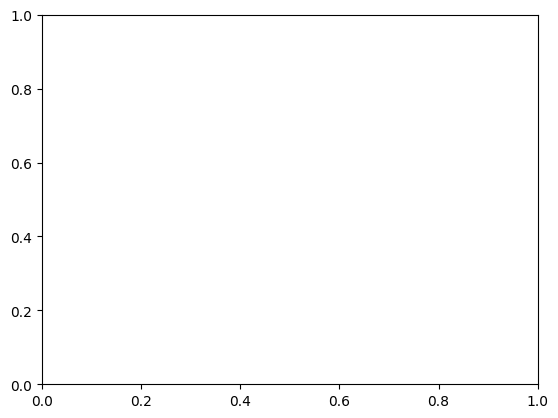

In [12]:
no_hardware = df[
    (df["solver"].str.strip() != "qaoa_hard")
    & (df["solver"].str.strip() != "inst_hard")
    & (df["solver"].str.strip() != "synth_hard")
]

fig, ax = plt.subplots()


data = {"qaoa": [], "synth": [], "inst": []}
x = {
    "qaoa": np.arange(2.5, 24, 3),
    "synth": np.arange(3, 25, 3),
    "inst": np.arange(3.5, 9.5, 3),
}
colors = {
    "qaoa": "b",
    "synth": "g",
    "inst": "r",
}

for ports in df['ports'].unique:  # [3, 6, 9, 12, 15, 18, 21, 24]:
    temp = no_hardware[no_hardware["ports"] == ports]
    for i, solver in enumerate(["qaoa", "synth", "inst"]):
        small = temp[temp["solver"].str.contains(solver)]
        if (ports == 12) & (solver != 'inst'):
            depths = []
            for problem in [1, 2]:
                tiny = small[small["problem_id"] == problem]
                depths.append(tiny["depths"].values[0])
                depths.append(tiny["depths"].values[9])
            depth = np.mean(depths)/3
        else:
            depth = np.mean(small["depths"])/3
        data[solver].append(depth)
data["inst"] = data["inst"][:2]

for key in data.keys():
    print(x[key])
    print(data[key])
    ax.bar(
        x[key],
       data[key],
        # temp["ports"] + 0.5 * (solverid // 3 - 1),
        # temp["opt_counts"] / 5 + 0.1,
        width=0.5,
        # bottom=-0.1,
        label=key,
        color=colors[key],
    )
ax.legend()

ax.set(
    xlim=(2, 22),
    xticks=np.arange(3, 24, 3),
)
ax.set_xlabel("Number of Qubits")
ax.set_ylabel("Depth")

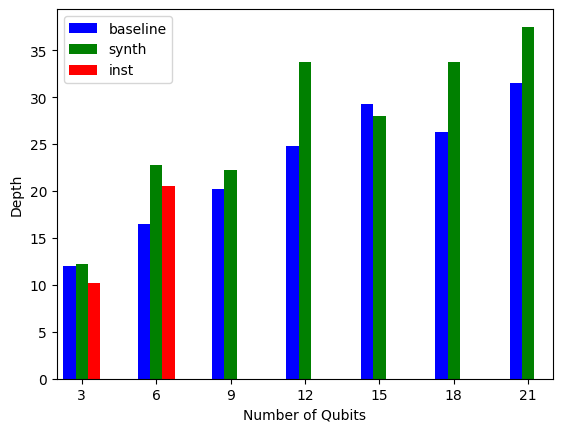

In [15]:
x = {
    "qaoa": np.arange(2.5, 21, 3),
    "synth": np.arange(3, 22, 3),
    "inst": np.arange(3.5, 9.5, 3),
}
data = {
    "qaoa": [12, 16.5, 20.25, 24.75, 29.25, 26.25, 31.5],
    "synth": [12.25, 22.75, 22.25, 33.75, 28, 33.75, 37.5],
    "inst": [10.25, 20.5],
}
fig, ax = plt.subplots()
ax.dpi = 500
for key in data.keys():
    ax.bar(
        x[key],
        data[key],
        # temp["ports"] + 0.5 * (solverid // 3 - 1),
        # temp["opt_counts"] / 5 + 0.1,
        width=0.5,
        # bottom=-0.1,
        label=key if key != "qaoa" else "baseline",
        color=colors[key],
    )
ax.legend()

ax.set(
    xlim=(2, 22),
    xticks=np.arange(3, 24, 3),
)
ax.set_xlabel("Number of Qubits")
ax.set_ylabel("Depth")

fig.savefig('depths.png')

# Solves?

In [ ]:
df[(df["solver"].str.strip() == "synth_hard") & (df["problem_id"] == 2)]

,good_counts,ports,constraints,num_qubits,opt_counts,n_jobs,depths,hard_indicator,z3_soft,soft_counts,validation,problem_id,solver
168,5,3,3,NaN,4,1,111,"[True, True, True, True, True]","[2, 3]","[[0, 3], [2, 3], [2, 3], [2, 3], [2, 3]]","[[0, 0, 0, 3], [0, 0, 2, 1], [0, 0, 2, 1], [0,...",2,synth_hard
169,5,6,8,NaN,0,1,151,"[True, True, True, True, True]","[6, 8]","[[4, 8], [4, 8], [4, 8], [5, 8], [3, 8]]","[[0, 0, 4, 4], [0, 0, 4, 4], [0, 0, 4, 4], [0,...",2,synth_hard
170,5,9,13,NaN,0,1,217,"[True, True, True, True, True]","[10, 13]","[[7, 13], [6, 13], [8, 13], [8, 13], [7, 13]]","[[0, 0, 7, 6], [0, 0, 6, 7], [0, 0, 8, 5], [0,...",2,synth_hard
171,5,12,18,NaN,0,1,311,"[True, True, True, True, True]","[14, 18]","[[9, 18], [6, 18], [9, 18], [10, 18], [9, 18]]","[[0, 0, 9, 9], [0, 0, 6, 12], [0, 0, 9, 9], [0...",2,synth_hard
172,5,15,23,NaN,0,1,263,"[True, True, True, True, True]","[18, 23]","[[12, 23], [14, 23], [9, 23], [15, 23], [11, 23]]","[[0, 0, 12, 11], [0, 0, 14, 9], [0, 0, 9, 14],...",2,synth_hard
173,5,18,28,NaN,0,1,462,"[True, True, True, True, True]","[22, 28]","[[17, 28], [13, 28], [12, 28], [14, 28], [16, ...","[[0, 0, 17, 11], [0, 0, 13, 15], [0, 0, 12, 16...",2,synth_hard
174,5,21,37,NaN,0,1,339,"[True, True, True, True, True]","[28, 37]","[[14, 37], [20, 37], [18, 37], [20, 37], [13, ...","[[0, 0, 14, 23], [0, 0, 20, 17], [0, 0, 18, 19...",2,synth_hard
175,5,24,42,NaN,0,1,546,"[True, True, True, True, True]","[32, 42]","[[24, 42], [18, 42], [18, 42], [12, 42], [17, ...","[[0, 0, 24, 18], [0, 0, 18, 24], [0, 0, 18, 24...",2,synth_hard


In [ ]:
df[(df["solver"].str.strip() == "synth_hard") & (df["problem_id"] == 2)][
    "hard_indicator"
].values[0][0]

True

/tmp/ipykernel_1513028/111784071.py:19: RuntimeWarning: invalid value encountered in scalar divide
  np.row_stack(temp["soft_counts"].values)[i][j][0]
/tmp/ipykernel_1513028/111784071.py:19: RuntimeWarning: invalid value encountered in scalar divide
  np.row_stack(temp["soft_counts"].values)[i][j][0]
/tmp/ipykernel_1513028/111784071.py:19: RuntimeWarning: invalid value encountered in scalar divide
  np.row_stack(temp["soft_counts"].values)[i][j][0]
/tmp/ipykernel_1513028/111784071.py:19: RuntimeWarning: invalid value encountered in scalar divide
  np.row_stack(temp["soft_counts"].values)[i][j][0]
/tmp/ipykernel_1513028/111784071.py:19: RuntimeWarning: invalid value encountered in scalar divide
  np.row_stack(temp["soft_counts"].values)[i][j][0]
/tmp/ipykernel_1513028/111784071.py:19: RuntimeWarning: invalid value encountered in scalar divide
  np.row_stack(temp["soft_counts"].values)[i][j][0]


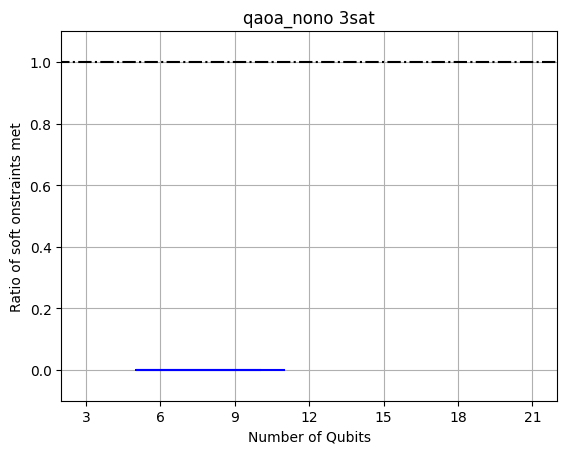

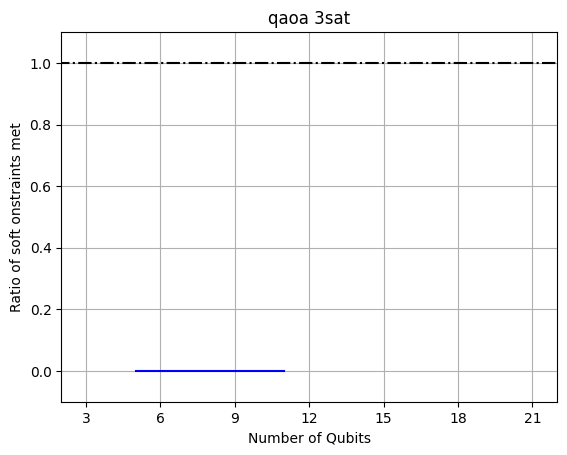

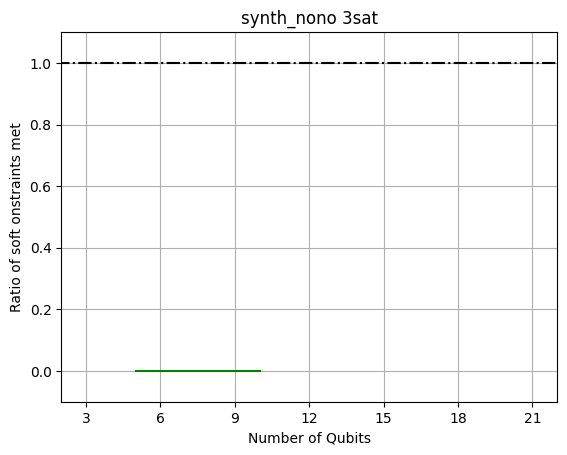

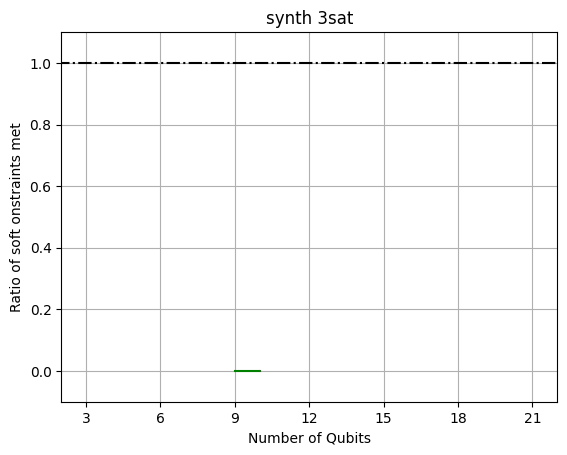

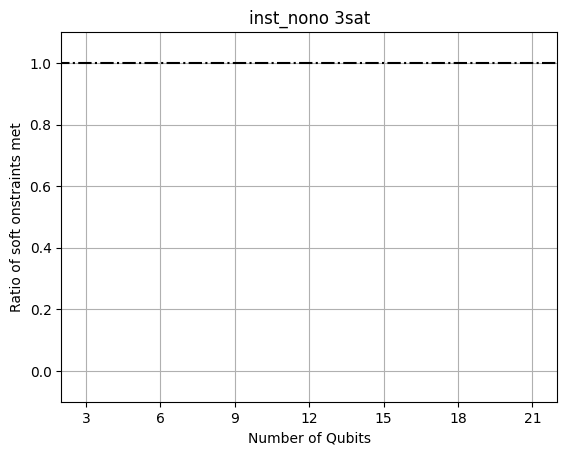

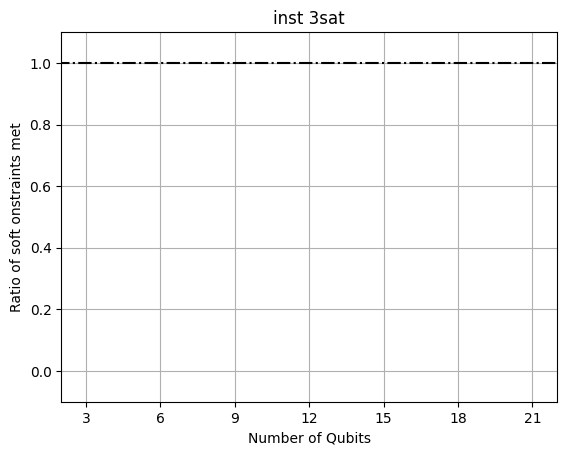

In [ ]:
lines_only = {
    "problem": [],
    "solver": [],
    "all_avgs": [],
    "cond_avgs": [],
    "dots": [],
}

# problems = ["minvert", "maxcut"]
problems = ["3sat"]
for id, problem in enumerate(problems):
    for solver in df["solver"].str.strip().unique():
        # temp = df[(df["solver"].str.strip() == solver) & (df["problem_id"] == id + 1)]
        temp = df[(df["solver"].str.strip() == solver) & (df["problem_id"] == 5)]
        x_temp = temp["ports"].values
        x = [5 * [x_temp[i]] for i in range(len(x_temp))]
        ys = [
            [
                np.row_stack(temp["soft_counts"].values)[i][j][0]
                / temp["z3_soft"].values[i][0]
                for j in range(5)
            ]
            for i in range(len(x))
        ]
        avg_line = [np.average(ys[i]) for i in range(len(x) - 8)]
        short_solver = solver.split("_")[0]
        if short_solver == "qaoa":
            color = "b"
        elif short_solver == "synth":
            color = "g"
        else:
            color = "r"
        plt.style.use("default")

        fig, ax = plt.subplots()
        y_avg = []
        y_cond_avg = []
        ax.plot([0, 24], [1, 1], color="k", linestyle="dashdot")
        cap = 7 if len(x) >= 7 else len(x)

        dots = []
        for i in range(cap):
            marker_list = ["x", "o"]
            avg_temp = []
            for j in range(5):
                marker_ind = 1 if temp["hard_indicator"].values[i][j] else 0
                m = MarkerStyle(marker_list[marker_ind])
                ax.plot(x[i][j], ys[i][j], color="k", marker=m)
                dots.append([x[i][j], ys[i][j], marker_list[marker_ind]])
                if marker_ind:
                    avg_temp.append(ys[i][j])
            y_avg.append(np.average(ys[i]))
            y_cond_avg.append(0 if avg_temp == [] else np.average(avg_temp))
            # print(ys[i])
        # ax.legend(
        #     [
        #         str(x) + " soft constraints"
        #         for x in np.stack(temp["z3_soft"].values).transpose()[1]
        #     ],
        #     ncols=3,
        # )
        lines_only["problem"].append(problem)
        lines_only["solver"].append(solver)
        lines_only["all_avgs"].append(y_avg)
        lines_only["cond_avgs"].append(y_cond_avg)
        lines_only["dots"].append(dots)

        ax.plot(x_temp[:cap], y_cond_avg, color=color)
        ax.plot(x_temp[:cap], y_avg, color=color, linestyle="dotted")
        ax.set(
            xlim=(2, 22),
            xticks=np.arange(3, 24, 3),
        )
        ax.set_xlabel("Number of Qubits")
        ax.set_ylabel("Ratio of soft onstraints met")
        if problem == "minvert":
            ax.set(ylim=(-0.1, 3.1), yticks=np.arange(0, 3.5, 0.5))
        else:
            ax.set(ylim=(-0.1, 1.1), yticks=np.arange(0, 1.2, 0.2))
        # ax.autoscale(axis="y")
        ax.grid(True)

        ax.set_title("" + solver + " " + problem)
        # plt.savefig("scatter" + solver + "_" + problem + ".png")

In [ ]:
lines_only["solver"]


['qaoa_nono',
 'qaoa',
 'qaoa_hard',
 'synth_nono',
 'synth',
 'synth_hard',
 'inst_nono',
 'inst',
 'inst_hard',
 'qaoa_nono',
 'qaoa',
 'qaoa_hard',
 'synth_nono',
 'synth',
 'synth_hard',
 'inst_nono',
 'inst',
 'inst_hard']

In [ ]:
np.stack([list(range(j,18,3)) for j in range(3)]).flatten()

array([ 0,  3,  6,  9, 12, 15,  1,  4,  7, 10, 13, 16,  2,  5,  8, 11, 14,
       17])

0


9
1
10
2
11


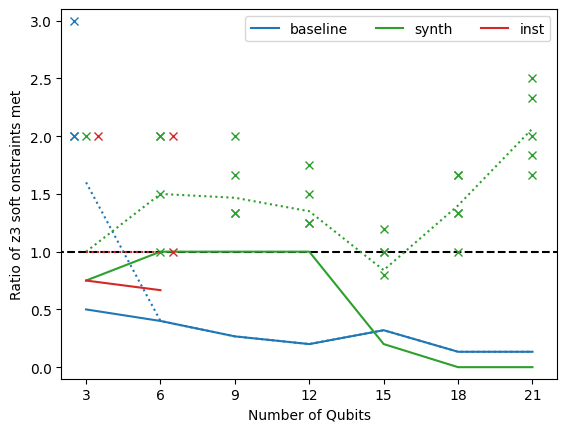

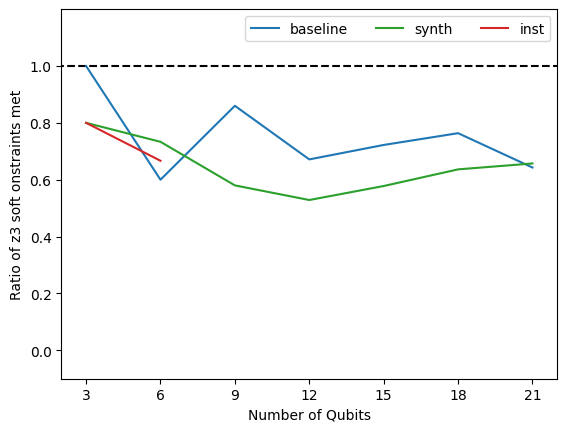

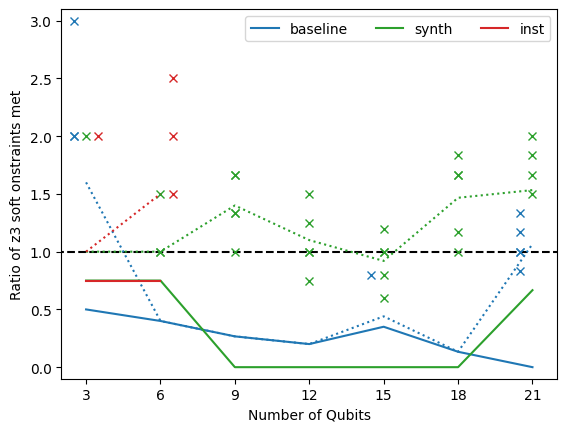

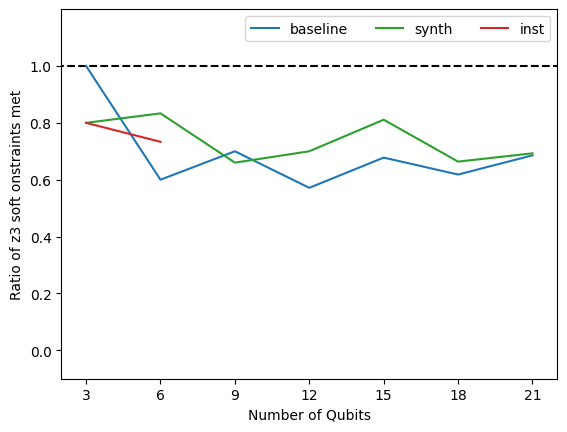

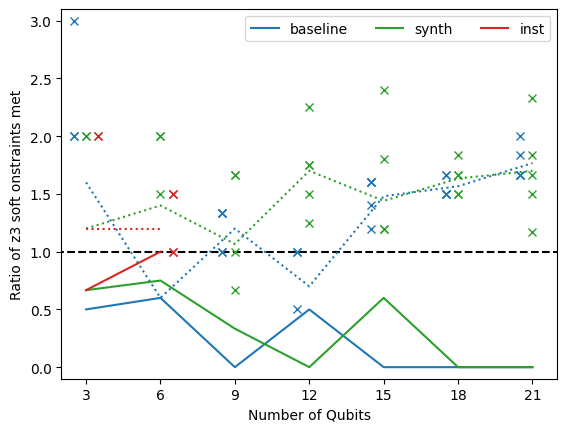

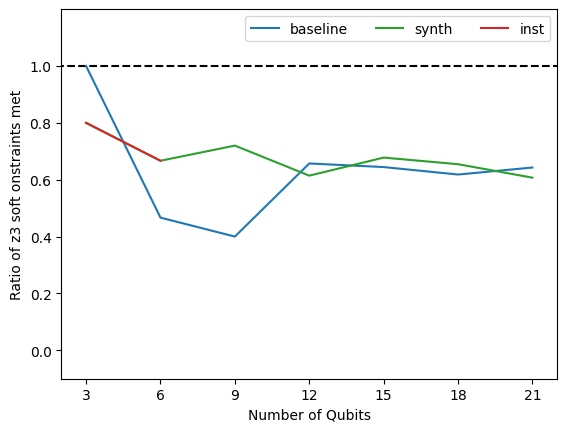

In [ ]:
colors = [
    "tab:blue",
    "tab:blue",
    "tab:blue",
    "tab:green",
    "tab:green",
    "tab:green",
    "tab:red",
    "tab:red",
    "tab:red",
    # "tab:purple",
    # "tab:brown",
    # "tab:pink",
    # "tab:orange",
    # "tab:gray",
    # "tab:olive",
    # "tab:cyan",
]
# custom_range = range(len(lines_only["solver"]))
custom_range = np.stack([list(range(j, 18, 3)) for j in range(3)]).flatten()
for i in custom_range:
    problem = lines_only["problem"][i]
    solver = lines_only['solver'][i]
    if i in [0, 1, 2, 9, 10, 11]:
        fig, ax = plt.subplots()
        ax.set(
            xlim=(2, 22),
            xticks=np.arange(3, 24, 3),
        )
        ax.plot([0, 24], [1, 1], linestyle="dashed", color="k")
        print(i)
        if lines_only["problem"][i] == "minvert":
            ax.set(ylim=(-0.1, 3.1), yticks=np.arange(0, 3.2, 0.5))
        else:
            ax.set(ylim=(-0.1, 1.2), yticks=np.arange(0, 1.2, 0.2))
    num_points = len(lines_only["cond_avgs"][i])
    if i < 9:
        ax.plot(
            np.arange(3, 3 * (num_points + 1), 3),
            lines_only["all_avgs"][i],
            linestyle="dotted",
            # label=lines_only["solver"][i],
            color=colors[i % 9],
        )
    name = (
        "baseline"
        if lines_only["solver"][i % 9 // 3 * 3 + 1] == "qaoa"
        else lines_only["solver"][i % 9 // 3 * 3 + 1]
    )
    ax.plot(
        np.arange(3, 3 * (num_points + 1), 3),
        lines_only["cond_avgs"][i],
        label=name,
        color=colors[i % 9],
    )

    for row in lines_only["dots"][i]:
        if row[2] == "x":
            ax.plot(
                row[0] + 0.5 * (i % 9 // 3 - 1),
                row[1],
                color=colors[i % 9],
                marker=MarkerStyle(row[2]),
            )
    # pos = [
    #     3 * (x + 1) + 0.5 * (i % 9 // 3 - 1)
    #     for x in range(len(lines_only["all_avgs"][i]))
    # ]
    # data = [
    #     [x[1] for x in lines_only["dots"][i] if x[2] == "o"][j : j + 5]
    #     for j in range(0, len(pos) * 5, 5)
    # ]
    # newdata = []
    # newpos = []
    # for j, row in enumerate(data):
    #     if row != []:
    #         newpos.append(pos[j])
    #         newdata.append(row)
    # if newdata != []:
    #     violin_parts = ax.violinplot(
    #         newdata,
    #         newpos,
    #         widths=1,
    #         showmeans=True,
    #         showextrema=True,
    #         showmedians=True,
    #     )
    #     for partname in ("cbars", "cmins", "cmaxes", "cmeans", "cmedians"):
    #         vp = violin_parts[partname]
    #         vp.set_edgecolor(colors[i % 9])
    #         vp.set_linewidth(1)
    #     for vp in violin_parts["bodies"]:
    #         vp.set_facecolor(colors[i % 9])
    #         vp.set_edgecolor(colors[i % 9])
    #         vp.set_linewidth(1)
    #         vp.set_alpha(0.5)

    ax.set_xlabel("Number of Qubits")
    ax.set_ylabel("Ratio of z3 soft onstraints met")
    ax.legend(loc=1, ncols=3)

    if solver.split("_")[0] == "inst":
        sim = {
            "inst_nono": "Ideal",
            "inst": "Noisy",
            "inst_hard": "Hardware",
        }
        # ax.set_title(problem + " " + sim[solver])

        plt.savefig("soft_" + sim[solver] + "_" + problem + ".png")

In [ ]:
[[x[1] for x in lines_only["dots"][6]][j : j + 5] for j in range(0, num_points * 5, 5)]

[[2.0, 1.0, 1.0, 1.0, 0.0], [1.0, 0.5, 2.0, 0.5, 1.0]]

In [ ]:
[3*(x+1) for x in range(len(lines_only["all_avgs"][6]))]

[3, 6]

In [ ]:
temp = df[(df["solver"].str.strip() == "synth") & (df["problem_id"] == 2)]
np.row_stack(temp["validation"].values)[1][j]

array([0, 0, 5, 3])

# Hard Constraints

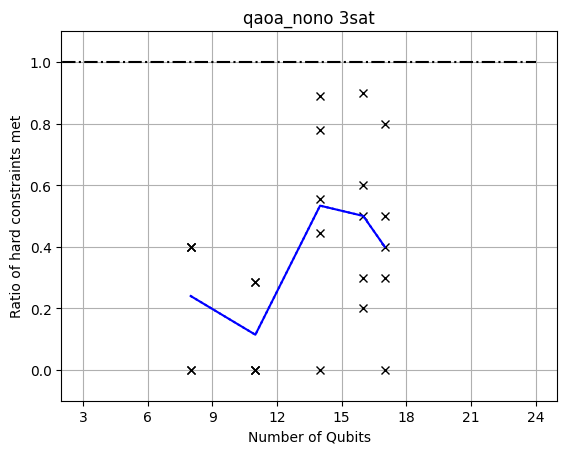

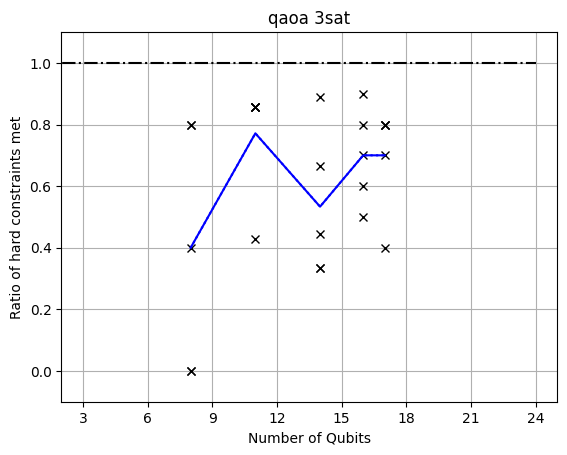

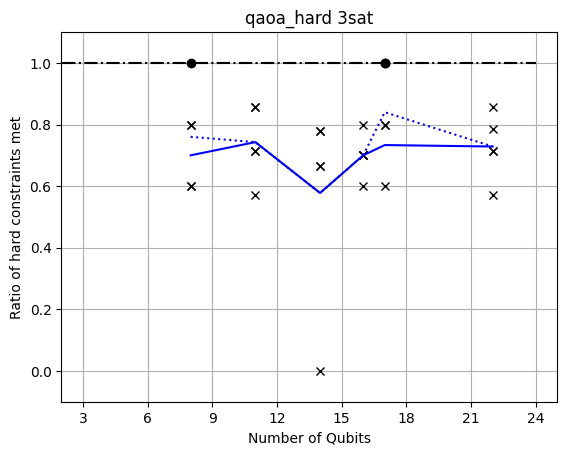

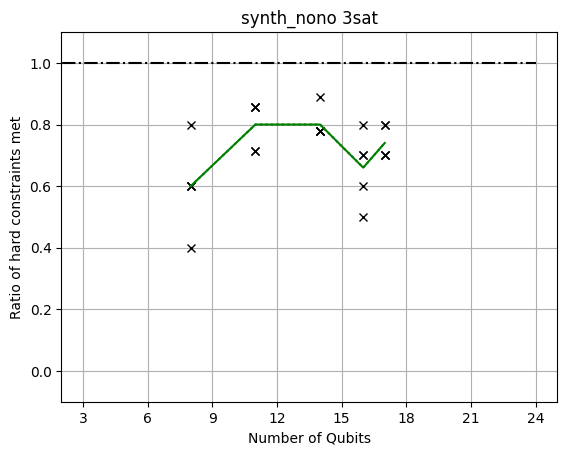

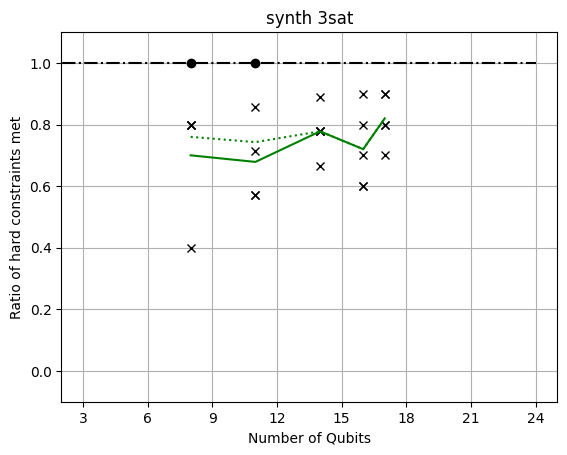

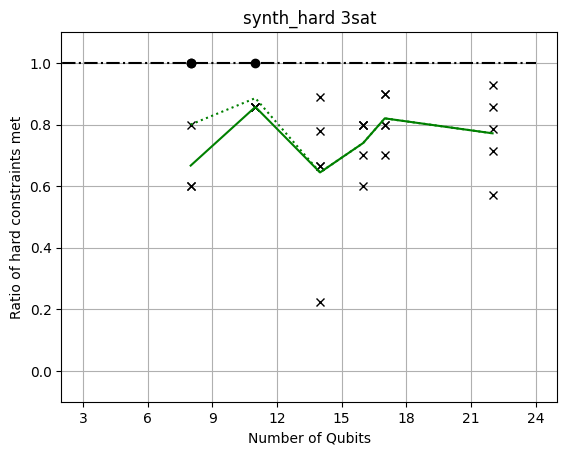

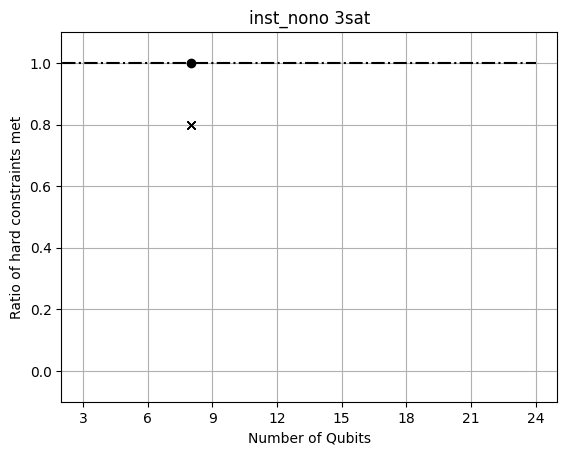

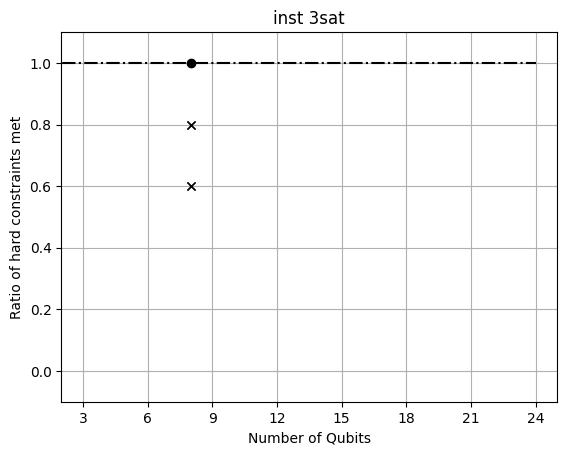

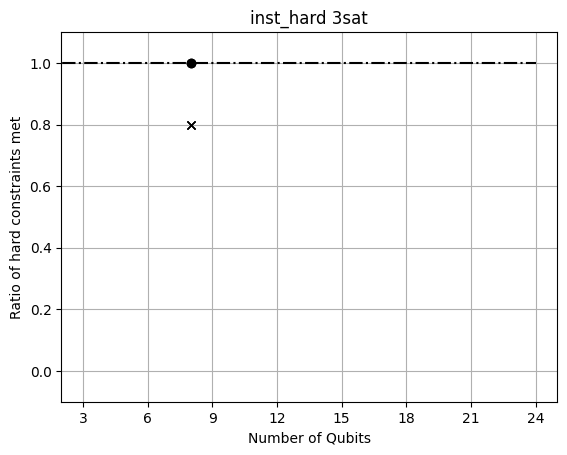

In [7]:
lines_only = {
    "problem": [],
    "solver": [],
    "all_avgs": [],
    "cond_avgs": [],
    "x_vals": [],
    "dots": [],
}

# problems = ["minvert"]
problems = ["3sat"]
for id, problem in enumerate(problems):
    for solver in df["solver"].str.strip().unique():
        # temp = df[(df["solver"].str.strip() == solver) & (df["problem_id"] == id + 1)]
        temp = df[(df["solver"].str.strip() == solver) & (df["problem_id"] == 5)]
        short_solver = solver.split("_")[0]
        if solver == 'synth_nono' or solver == 'synth':
            temp = temp.tail(5)
        else:
            temp = temp.tail(6)
        temp = temp.sort_values(by=["num_qubits"])
        x_temp = temp["num_qubits"]  # temp["ports"].values
        x = [5 * [x_temp.iloc[i]] for i in range(len(x_temp))]
        ys = [
            [
                np.row_stack(temp["validation"].values)[i][j][0]
                / (
                    np.row_stack(temp["validation"].values)[i][j][0]
                    + np.row_stack(temp["validation"].values)[i][j][1]
                )
                for j in range(5)
            ]
            for i in range(len(x))
        ]
        avg_line = [np.average(ys[i]) for i in range(len(x) - 8)]

        if short_solver == "qaoa":
            color = "b"
        elif short_solver == "synth":
            color = "g"
        else:
            color = "r"
        plt.style.use("default")

        fig, ax = plt.subplots()
        y_avg = []
        y_cond_avg = []
        ax.plot([0, 24], [1, 1], color="k", linestyle="dashdot")
        cap = 7 if len(x) >= 7 else len(x)

        dots = []
        for i in range(cap):
            marker_list = ["x", "o"]
            avg_temp = []
            for j in range(5):
                marker_ind = 1 if temp["hard_indicator"].values[i][j] else 0
                m = MarkerStyle(marker_list[marker_ind])
                ax.plot(x[i][j], ys[i][j], color="k", marker=m)
                dots.append([x[i][j], ys[i][j], marker_list[marker_ind]])
                if np.row_stack(temp["validation"].values)[i][j][1]:
                    avg_temp.append(ys[i][j])
            y_avg.append(np.average(ys[i]))
            y_cond_avg.append(0 if avg_temp == [] else np.average(avg_temp))
            # print(ys[i])
        # ax.legend(
        #     [
        #         str(x) + " soft constraints"
        #         for x in np.stack(temp["z3_soft"].values).transpose()[1]
        #     ],
        #     ncols=3,
        # )
        lines_only["problem"].append(problem)
        lines_only["solver"].append(solver)
        lines_only["all_avgs"].append(y_avg)
        lines_only["cond_avgs"].append(y_cond_avg)
        lines_only["x_vals"].append(x_temp.values)

        lines_only["dots"].append(dots)

        ax.plot(x_temp[:cap], y_cond_avg, color=color)
        ax.plot(x_temp[:cap], y_avg, color=color, linestyle="dotted")
        ax.set(
            xlim=(2, 25),
            xticks=np.arange(3, 27, 3),
        )
        ax.set_xlabel("Number of Qubits")
        ax.set_ylabel("Ratio of hard constraints met")
        # if problem == "minvert":
        #     ax.set(ylim=(-0.1, 3.1), yticks=np.arange(0, 3.5, 0.5))
        # else:
        ax.set(ylim=(-0.1, 1.1), yticks=np.arange(0, 1.2, 0.2))
        # ax.autoscale(axis="y")
        ax.grid(True)

        ax.set_title("" + solver + " " + problem)
        # plt.savefig("hard_" + solver + "_" + problem + ".png")

In [31]:
lines_only['cond_avgs']


[[0.24000000000000005, 0.11428571428571428, 0.5333333333333334, 0.5, 0.4],
 [0.4, 0.7714285714285715, 0.5333333333333334, 0.7000000000000001, 0.7],
 [0.7428571428571429,
  0.5777777777777777,
  0.7,
  0.7333333333333334,
  0.7285714285714286],
 [0.6000000000000001, 0.8, 0.8, 0.6599999999999999, 0.7399999999999999],
 [0.7000000000000001, 0.6785714285714286, 0.7777777777777777, 0.72, 0.82],
 [0.8571428571428571,
  0.6444444444444444,
  0.74,
  0.8200000000000001,
  0.7714285714285716],
 [0.8],
 [0.7],
 [0.8000000000000002]]

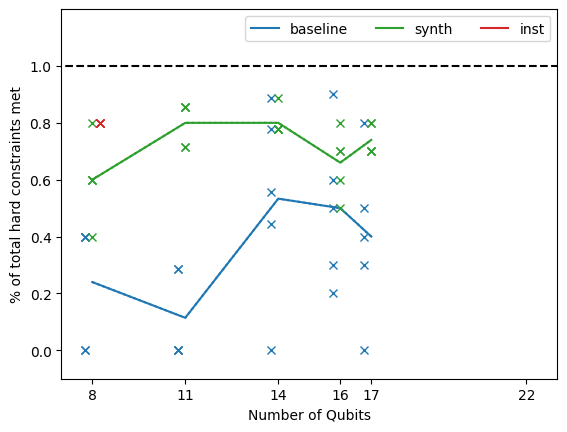

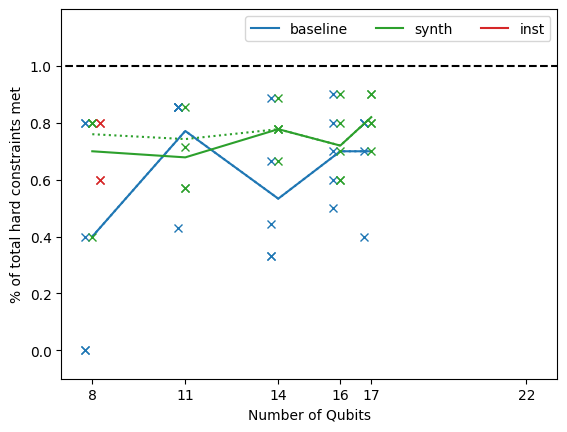

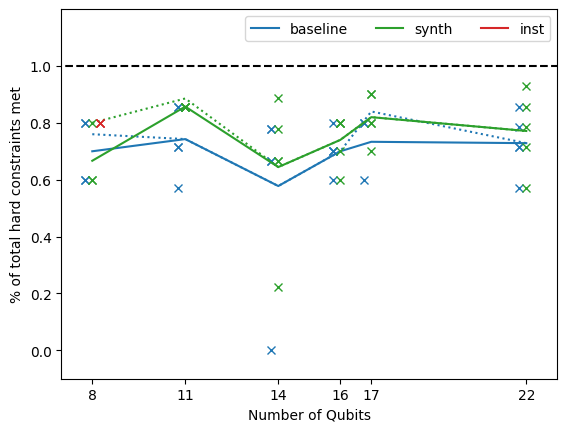

In [8]:
colors = [
    "tab:blue",
    "tab:blue",
    "tab:blue",
    "tab:green",
    "tab:green",
    "tab:green",
    "tab:red",
    "tab:red",
    "tab:red",
    # "tab:purple",
    # "tab:brown",
    # "tab:pink",
    # "tab:orange",
    # "tab:gray",
    # "tab:olive",
    # "tab:cyan",
]
# custom_range = range(len(lines_only["solver"]))
custom_range = np.stack([list(range(j, 9, 3)) for j in range(3)]).flatten()
for i in custom_range:
    if i in [0, 1, 2]:
        fig, ax = plt.subplots()
        ax.set(
            xlim=(7, 23),
            # xticks=np.arange(3, 27, 3),
            xticks=[8, 11, 14, 16, 17, 22],
        )
        ax.plot([0, 24], [1, 1], linestyle="dashed", color="k")
        ax.set(ylim=(-0.1, 1.2), yticks=np.arange(0, 1.2, 0.2))
    num_points = len(lines_only["cond_avgs"][i])
    name = (
        "baseline"
        if lines_only["solver"][i % 9 // 3 * 3 + 1] == "qaoa"
        else lines_only["solver"][i % 9 // 3 * 3 + 1]
    )
    if i < 9:
        ax.plot(
            # np.arange(3, 3 * (num_points + 1), 3),
            lines_only["x_vals"][i],
            lines_only["all_avgs"][i],
            linestyle="dotted",
            # label=name,
            color=colors[i % 9],
        )

    ax.plot(
        lines_only["x_vals"][i],
        lines_only["cond_avgs"][i],
        label=name,
        color=colors[i % 9],
    )

    for row in lines_only["dots"][i]:
        if row[2] == "x":
            ax.plot(
                row[0] + 0.25 * (i % 9 // 3 - 1),
                row[1],
                color=colors[i % 9],
                marker=MarkerStyle(row[2]),
            )
    # pos = [
    #     3 * (x + 1) + 0.5 * (i % 9 // 3 - 1)
    #     for x in range(len(lines_only["all_avgs"][i]))
    # ]
    # data = [
    #     [x[1] for x in lines_only["dots"][i] if x[2] == "x"][j : j + 5]
    #     for j in range(0, len(pos) * 5, 5)
    # ]
    # newdata = []
    # newpos = []
    # for j, row in enumerate(data):
    #     if row != []:
    #         newpos.append(pos[j])
    #         newdata.append(row)
    # if newdata != []:
    #     violin_parts = ax.violinplot(
    #         newdata,
    #         newpos,
    #         widths=1,
    #         showmeans=True,
    #         showextrema=True,
    #         showmedians=True,
    #     )
    #     for partname in ("cbars", "cmins", "cmaxes", "cmeans", "cmedians"):
    #         vp = violin_parts[partname]
    #         vp.set_edgecolor(colors[i % 9])
    #         vp.set_linewidth(1)
    #     for vp in violin_parts["bodies"]:
    #         vp.set_facecolor(colors[i % 9])
    #         vp.set_edgecolor(colors[i % 9])
    #         vp.set_linewidth(1)
    #         vp.set_alpha(0.5)

    ax.set_xlabel("Number of Qubits")
    ax.set_ylabel("% of total hard constraints met")
    ax.legend(loc=1, ncols=3)
    if solver.split("_")[0] == "inst":
        sim = {
            "inst_nono": "Ideal",
            "inst": "Noisy",
            "inst_hard": "Hardware",
        }
        # ax.set_title(problem + " " + sim[solver])
    if i == 6:
        plt.savefig("hard_Ideal_" + problem + ".png")
    elif i == 7:
        plt.savefig("hard_Noisy_" + problem + ".png")
    elif i == 8:
        plt.savefig("hard_Hardware_" + problem + ".png")
    else:
        pass

In [99]:
lines_only['x_vals']

[array([ 8., 11., 14., 16., 17.]),
 array([ 8., 11., 14., 16., 17.]),
 array([11., 14., 16., 17., 22.]),
 array([ 8., 11., 14., 16., 17.]),
 array([ 8., 11., 14., 16., 17.]),
 array([11., 14., 16., 17., 22.]),
 array([8.]),
 array([8.]),
 array([8.])]

# Top 5s

In [ ]:
df[(df["problem_id"] == 1) & (df["ports"]==3)]

,good_counts,ports,constraints,num_qubits,opt_counts,n_jobs,depths,hard_indicator,z3_soft,soft_counts,validation,problem_id,solver
0,2,3,6,3.0,1,1,32,"[False, False, False, True, True]","[1, 3]","[[3, 3], [2, 3], [2, 3], [0, 3], [1, 3]]","[[0, 3, 3, 0], [2, 1, 2, 1], [2, 1, 2, 1], [3,...",1,qaoa_nono
15,2,3,6,3.0,1,1,32,"[False, False, False, True, True]","[1, 3]","[[3, 3], [2, 3], [2, 3], [0, 3], [1, 3]]","[[0, 3, 3, 0], [2, 1, 2, 1], [2, 1, 2, 1], [3,...",1,qaoa
30,2,3,6,NaN,1,1,59,"[False, True, False, True, False]","[1, 3]","[[3, 3], [1, 3], [2, 3], [0, 3], [2, 3]]","[[0, 3, 3, 0], [3, 0, 1, 2], [2, 1, 2, 1], [3,...",1,qaoa_hard
47,4,3,6,3.0,3,1,30,"[True, False, True, True, True]","[1, 3]","[[1, 3], [2, 3], [0, 3], [1, 3], [1, 3]]","[[3, 0, 1, 2], [2, 1, 2, 1], [3, 0, 0, 3], [3,...",1,synth_nono
62,4,3,6,3.0,3,1,30,"[True, False, True, True, True]","[1, 3]","[[1, 3], [2, 3], [0, 3], [1, 3], [1, 3]]","[[3, 0, 1, 2], [2, 1, 2, 1], [3, 0, 0, 3], [3,...",1,synth
77,3,3,6,NaN,2,1,93,"[False, True, True, True, False]","[1, 3]","[[2, 3], [1, 3], [0, 3], [1, 3], [2, 3]]","[[2, 1, 2, 1], [3, 0, 1, 2], [3, 0, 0, 3], [3,...",1,synth_hard
85,4,3,6,3.0,3,1,29,"[False, True, True, True, True]","[1, 3]","[[2, 3], [1, 3], [1, 3], [1, 3], [0, 3]]","[[2, 1, 2, 1], [3, 0, 1, 2], [3, 0, 1, 2], [3,...",1,inst_nono
87,4,3,6,3.0,3,1,29,"[False, True, True, True, True]","[1, 3]","[[2, 3], [1, 3], [1, 3], [1, 3], [0, 3]]","[[2, 1, 2, 1], [3, 0, 1, 2], [3, 0, 1, 2], [3,...",1,inst
89,3,3,6,NaN,2,1,93,"[False, True, True, True, False]","[1, 3]","[[2, 3], [1, 3], [1, 3], [0, 3], [2, 3]]","[[2, 1, 2, 1], [3, 0, 1, 2], [3, 0, 1, 2], [3,...",1,inst_hard


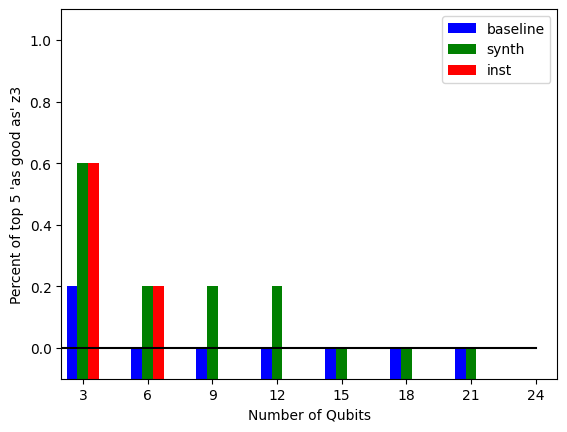

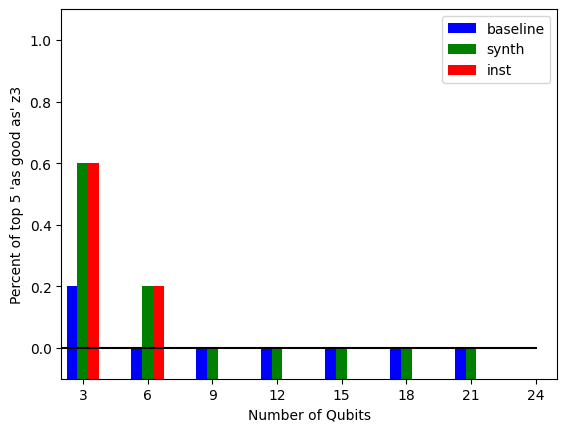

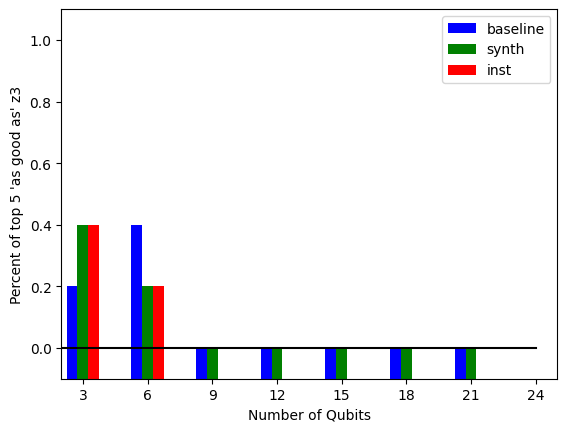

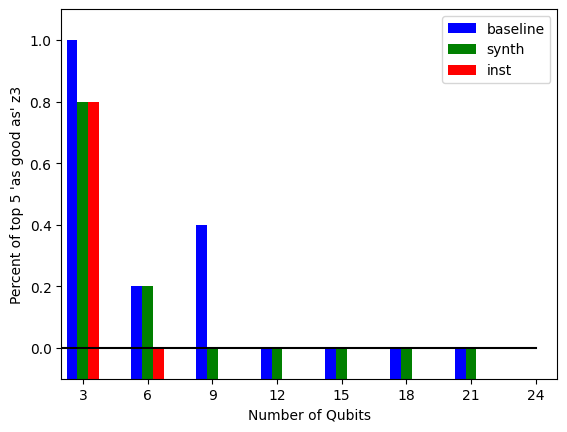

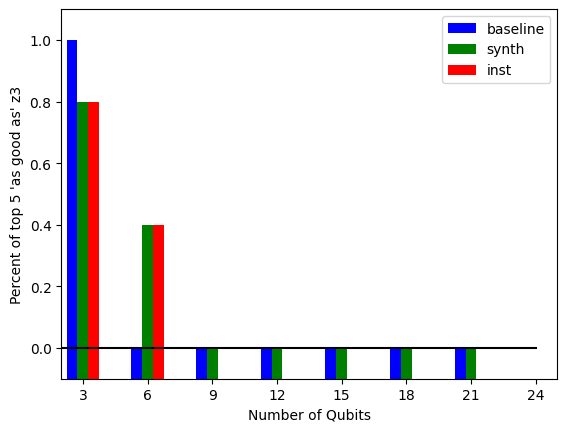

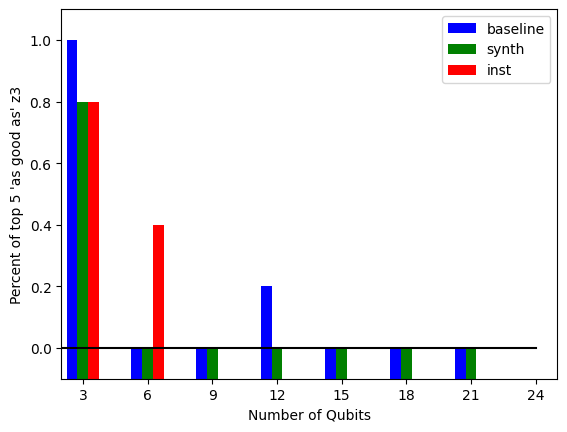

In [25]:
colors = {"baseline": "b", "synth": "g", "inst": "r"}

problems = ["minvert", "maxcut"]
# problems = ["3sat"]
for id, problem in enumerate(problems):
    for solverid in np.stack([list(range(j, 9, 3)) for j in range(3)]).flatten():
        solver = df["solver"].str.strip().unique()[solverid]
        short_name = solver.split("_")[0]
        temp = df[(df["problem_id"] == id + 1) & (df["solver"].str.strip() == solver)]
        # temp = df[(df["problem_id"] == id + 5) & (df["solver"].str.strip() == solver)]
        # if solver == "synth_nono" or solver == "synth":
        #     temp = temp.tail(5)
        # else:
        #     temp = temp.tail(6)
        temp = temp.head(7)
        if solverid in [0, 1, 2]:
            fig, ax = plt.subplots()
            ax.set(
                xlim=(2, 25),
                xticks=np.arange(3, 26, 3),
                # xticks=[8, 11, 14, 16, 17, 22],
                ylim=(-0.1, 1.1),
                yticks=np.arange(0, 1.2, 0.2),
            )
            # ax.grid(True)
            ax.plot([0, 24], [0, 0], color="k")

        name = "baseline" if short_name == "qaoa" else short_name
        x_locs = temp["num_qubits"][:7] + 0.2 * (solverid // 3 - 1)
        # heights = pd.DataFrame(temp["hard_indicator"].to_list()).sum(axis=1) / 5 + 0.1
        heights = pd.DataFrame(
            [
                [
                    temp["z3_soft"].iloc[row][0]
                    <= (temp["hard_indicator"] * temp["soft_counts"]).iloc[row][i][0]
                    for i in range(5)
                ]
                for row in range(len(temp))
            ]
        ).sum(axis=1) /5 + 0.1
        pass
        ax.bar(
            # x_locs,
            # heights[:7],
            temp["ports"] + 0.5 * (solverid // 3 - 1),
            # temp["opt_counts"] / 5 + 0.1,
            heights,
            width=0.5,
            bottom=-0.1,
            label=name,
            color=colors[name],
        )
        ax.legend()

        ax.set_xlabel("Number of Qubits")
        ax.set_ylabel("Percent of top 5 'as good as' z3")
        # ax.plot([0, 24], [1, 1], linestyle="dashed", color="k")
        if solver.split("_")[0] == "inst":
            sim = {
                "inst_nono": "Ideal",
                "inst": "Noisy",
                "inst_hard": "Hardware",
            }
            # ax.set_title(problem + " " + sim[solver])
            plt.savefig("top5_" + problem + "_" + sim[solver] + ".png")